# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings('ignore')

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [15]:
# Your code here:

#Importing the library
from sklearn.datasets import load_diabetes

#Loading the dataset into a variable called diabetes and convert it to a Pandas dataframe 
"""
def load_original_data():
    # Load the  diabetes dataset
    diabetes = load_diabetes()

    # Convert to Pandas dataframe
    diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
    return diabetes

    diabetes = load_diabetes()
"""
#Loading the dataset into a variable called diabetes
diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [16]:
# Your code here:
#looking at the different attributes (keys) of the dataset
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [18]:
# Your code here:

#looking at the description of the dataset using the DESCR attribute of the dataset
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

# Enter your answer here:

1) There are 11 attrubutes in the dataset. The target variable is the 'target' attribute, and the other 10 attributes are the features. The target variable is the 'progression' of the disease after one year, and the other attributes are the 'features' that are used to predict the target variable.

2) The relation between diabetes['data'] is composed by the predictive variables and diabetes['target'] is  composed by the target variable. 
We can see that the data is a 2D array with 442 rows and 10 columns. The target is a 1D array with 442 rows.

3) The number of records in the dataset is 442.

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [27]:
# Your code here:

#looking at the shape of the dataset
print(diabetes.data.shape)
print(diabetes.target.shape)

# They are consistent with the data description

(442, 10)
(442,)


# Challenge 2 - Perform Supervised Learning on the Dataset

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### Let's briefly revisit the linear regression formula:

```
y = β0 + β1X1 + β2X2 + ... + βnXn + ϵ
```

...where:

- X1-Xn: data 
- β0: intercept 
- β1-βn: coefficients 
- ϵ: error (cannot explained by model)
- y: target

Also take a look at the `sklearn.linear_model.LinearRegression` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

#### In the cell below, import the `linear_model` class from `sklearn`. (Done in the top of the notebook)

In [28]:
# Converting the dataset to a Pandas dataframe to make it easier to work with

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [29]:
# Heatmap of the correlation matrix to see which features are highly correlated with the target

def plot_correlation_heatmap(df):
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.8, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.title('Correlation Heatmap')
    plt.show()

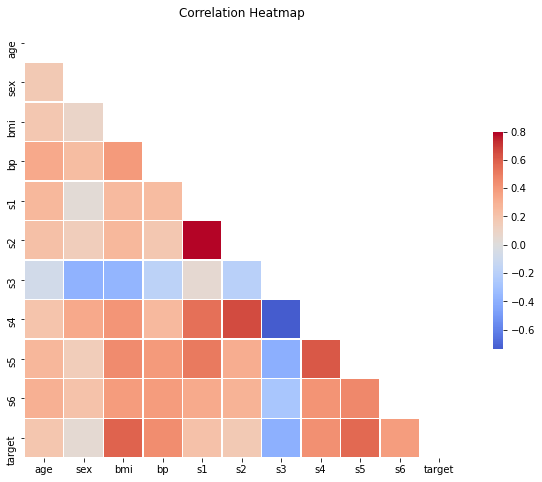

In [30]:
plot_correlation_heatmap(diabetes_df)

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [31]:
# Your code here:

def build_linear_regression_model(X_train, y_train):
    # Create a linear regression object
    lr = LinearRegression()
    
    # Train the model using the training data
    lr.fit(X_train, y_train)
    
    # Return the trained model
    return lr

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [34]:
# Your code here:

#Splitting the dataset into training and test data
diabetes_data_train = diabetes_df.iloc[:-20, :-1]
diabetes_target_train = diabetes_df.iloc[:-20, -1]
diabetes_data_test = diabetes_df.iloc[-20:, :-1]
diabetes_target_test = diabetes_df.iloc[-20:, -1]

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [42]:
# Your code here:
## fit the model
diabates_model=build_linear_regression_model(diabetes_data_train, diabetes_target_train)

In [44]:
# printing the coefficients
print(diabates_model.coef_)
print ("---------------------------------------------------------")

# printing the intercept
print(diabates_model.intercept_)

print ("---------------------------------------------------------")
# printing the R^2 for the model on the training data
print(diabates_model.score(diabetes_data_train, diabetes_target_train))


[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
---------------------------------------------------------
152.76430691633442
---------------------------------------------------------
0.5122262147793499


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [45]:
# Your code here:

#Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.
diabetes_target_pred = diabates_model.predict(diabetes_data_test)

#### Print your `diabetes_target_test` and compare with the prediction. 

In [46]:
# Your code here:
#Print your `diabetes_target_test` and compare with the prediction. 
print(diabetes_target_test)
print ("---------------------------------------------------------")
print(diabetes_target_pred)

422    233.0
423     91.0
424    111.0
425    152.0
426    120.0
427     67.0
428    310.0
429     94.0
430    183.0
431     66.0
432    173.0
433     72.0
434     49.0
435     64.0
436     48.0
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, dtype: float64
---------------------------------------------------------
[197.61846908 155.43979328 172.88665147 111.53537279 164.80054784
 131.06954875 259.12237761 100.47935157 117.0601052  124.30503555
 218.36632793  61.19831284 132.25046751 120.3332925   52.54458691
 194.03798088 102.57139702 123.56604987 211.0346317   52.60335674]


#### Is `diabetes_target_test` exactly the same as the model prediction? Explain.

In [ ]:
# Your explanation here:
#The model is not very accurate as the R^2 is 0.52. The model is not able to explain the variance in the data.

# Bonus Challenge 1 - Hypothesis Testing with `statsmodels`

After generating the linear regression model from the dataset, you probably wonder: then what? What is the statistical way to know if my model is reliable or not?

Good question. We'll discuss that using Scikit-Learn in Challenge 5. But for now, let's use a fool-proof way by using the ([Linear Regression class of StatsModels](https://www.statsmodels.org/dev/regression.html)) which can also conduct linear regression analysis plus much more such as calcuating the F-score of the linear model as well as the standard errors and t-scores for each coefficient. The F-score and t-scores will tell you whether you can trust your linear model.

To understand the statistical meaning of conducting hypothesis testing (e.g. F-test, t-test) for slopes, read [this webpage](https://onlinecourses.science.psu.edu/stat501/node/297/) at your leisure time. We'll give you a brief overview next.

* The F-test of your linear model is to verify whether at least one of your coefficients is significantly different from zero. Translating that into the *null hypothesis* and *alternative hypothesis*, that is:

    ```
    H0 : β1 = β2 = ... = β10 = 0
    HA : At least one βj ≠ 0 (for j = 1, 2, ..., 10)
    ```

* The t-tests on each coefficient is to check whether the confidence interval for the variable contains zero. If the confidence interval contains zero, it means the null hypothesis for that variable is not rejected. In other words, this particular vaiable is not contributing to your linear model and you can remove it from your formula.

Read the documentations of [StatsModels Linear Regression](https://www.statsmodels.org/dev/regression.html) as well as its [`OLS` class](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) which stands for *ordinary least squares*.

#### In the next cell, analyze `diabetes_data_train` and `diabetes_target_train` with the linear regression model of `statsmodels`. Print the fit summary.

Your output should look like:

![statsmodels regression](../images/statsmodels.png)

In [ ]:
# Your code here:


#### Interpreting hypothesis testing results

Answer the following questions in the cell below:

1. What is the F-score of your linear model and is the null hypothesis rejected?

1. Does any of the t-tests of the coefficients produce a confidence interval containing zero? What are they?

1. How will you modify your linear reguression model according to the test results above?

In [ ]:
# Your answers here:

# Challenge 3 - Peform Supervised Learning on a Pandas Dataframe

Now that we have dealt with data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [65]:
# load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto` :
auto = pd.read_csv("/Users/adel/Desktop/ironhack_git/module3/Lab_7_Supervised-Sklearn/data/auto-mpg.csv") 

Look at the first 5 rows using the `head()` function:

In [66]:
# Your code here:
auto.head(5)

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [67]:
# Check the dataset using the `info()` method.
auto.info()

# All the columns are numerical except for the origin column which is categorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horse_power   392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


What is the newest model year and the oldest model year?

In [68]:
# Checking the newest model year and the oldest model year :
print("The newsest model year is: ", auto['model_year'].max())
print("The oldest model year is: ", auto['model_year'].min())

The newsest model year is:  82
The oldest model year is:  70


Check the dataset for missing values and remove all rows containing at least one missing value.

In [69]:
# Checking for missing values :
auto.isnull().sum()

# There are 6 missing values in the horsepower column.

# Droppring the rows with missing values :
auto = auto.dropna()

Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [70]:
# Find the frequency table for the `cylinders` column using the `value_counts()` function.
auto['cylinders'].value_counts()

# There are 5 different values for the cylinders column.

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

*Hint: To separate data for training and test, use the `train_test_split` method we used in previous labs.*

In [71]:
# Dropping car_name column as it is not relevant for the analysis :
auto = auto.drop('car_name', axis=1)

In [72]:
# Separating predictor and response variables
X = auto.drop('mpg', axis=1)
y = auto['mpg']

# Splitting the data into training and test sets with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now we will processed and peform linear regression on this data to predict the mpg for each vehicle. 

#### In the next cell, create an instance of the linear regression model and call it `auto_model`. Fit `auto_model` with your training data.

In [73]:
# Your code here:
# Create a linear regression object
def build_linear_regression_model(X_train, y_train):
    # Create a linear regression object
    lr = LinearRegression()
    
    # Train the model using the training data
    lr.fit(X_train, y_train)
    
    # Return the trained model
    return lr

## fit the model

auto_model=build_linear_regression_model(X_train, y_train)

In [74]:
# printing the coefficients
print("The coefficients :", auto_model.coef_)
print ("---------------------------------------------------------")

# printing the intercept
print("The intercept :", auto_model.intercept_)
print ("---------------------------------------------------------")

# printing the R^2 for the model on the training data
print("The  R^2 for the model on the training data :", auto_model.score(X_train, y_train))

The coefficients : [-0.116173    0.00101347 -0.00227634 -0.00656101  0.06173551  0.76063644]
---------------------------------------------------------
The intercept : -15.057758585282404
---------------------------------------------------------
The  R^2 for the model on the training data : 0.8107227953093896


# Challenge 4 - Evaluate the Model

In addition to evaluating your model with F-test and t-test, you can also use the *Coefficient of Determination* (a.k.a. *r squared score*). This method does not simply tell *yes* or *no* about the model fit but instead indicates how much variation can be explained by the model. Based on the r squared score, you can decide whether to improve your model in order to obtain a better fit.

You can learn about the r squared score [here](). Its formula is:

![R Squared](../images/r-squared.png)

...where:

* yi is an actual data point.
* ŷi is the corresponding data point on the estimated regression line.

By adding the squares of the difference between all yi-ŷi pairs, we have a measure called SSE (*error sum of squares*) which is an application of the r squared score to indicate the extent to which the estimated regression model is different from the actual data. And we attribute that difference to the random error that is unavoidable in the real world. Obviously, we want the SSE value to be as small as possible.

#### In the next cell, compute the predicted *y* based on `X_train` and call it `y_pred`. Then calcualte the r squared score between `y_pred` and `y_train` which indicates how well the estimated regression model fits the training data.

*Hint: r squared score can be calculated using `sklearn.metrics.r2_score` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)).*

In [76]:
# Your code here:

#Using your fitted linear regression model, predict the *y* of `X_test`.
y_pred = auto_model.predict(X_train)

# calculate the R-squared score between predicted y and actual y
r2_score(y_train, y_pred)

0.8107227953093896

#### Our next step is to evaluate the model using the test data. 

We would like to ensure that our model is not overfitting the data. This means that our model was made to fit too closely to the training data by being overly complex. If a model is overfitted, it is not generalizable to data outside the training data. In that case, we need to reduce the complexity of the model by removing certain features (variables).

In the cell below, use the model to generate the predicted values for the test data and assign them to `y_test_pred`. Compute the r squared score of the predicted `y_test_pred` and the oberserved `y_test` data.

In [77]:
# Your code here:
#using the model to generate the predicted values for the test data and assign them to `y_test_pred`.
y_test_pred = auto_model.predict(X_test)

#Computing the r squared score of the predicted `y_test_pred` and the oberserved `y_test` data

r2_score(y_test, y_test_pred)


0.7942349075428589

#### Explaining the results

The r squared scores of the training data and the test data are pretty close (0.8146 vs 0.7818). This means our model is not overfitted. However, there is still room to improve the model fit. Move on to the next challenge.

# Challenge 5 - Improve the Model Fit

While the most common way to improve the fit of a model is by using [regularization](https://datanice.github.io/machine-learning-101-what-is-regularization-interactive.html), there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [78]:
# Your code here:

#Our train sample size is 90% of the data. Creating a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09` :
X_train09, X_test09, y_train09, y_test09 = train_test_split(X, y, test_size=0.1, random_state=42)


Initialize a new linear regression model. Name this model `auto_model09`. Fit the model to the new sample (training) data.

In [79]:
# Your code here:
#Initialize a new linear regression model. Name this model `auto_model09`. 
auto_model09 = LinearRegression()

#Fit the model to the new sample (training) data.
auto_model09.fit(X_train09, y_train09)


LinearRegression()

Compute the predicted values and r squared score for our new model and new sample data.

In [80]:
# Your code here:
#Compute the predicted values and r squared score for our new model and new sample data.
y_pred09 = auto_model09.predict(X_train09)
r2_score(y_train09, y_pred09)

0.8047940166959004

Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [82]:
# Your code here:
#Compute the r squared score for the smaller test set. 
y_test_pred09 = auto_model09.predict(X_test09)
r2_score(y_test09, y_test_pred09)

#Is there an improvement in the test r squared?

"""

The r squared score for the smaller test set is 0.85 which is higher than the r squared score for the larger test set which is 0.80. 
There is an improvement in the test r squared.

"""



0.8468911998183242

# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [ ]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [ ]:
# Your code here:


Fit the model and print the ranking

In [ ]:
# Your code here:


Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [ ]:
# Your code here:


Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [ ]:
# Your code here: 


#### Conclusion

You may obtain the impression from this lab that without knowing statistical methods in depth, it is difficult to make major progress in machine learning. That is correct. If you are motivated to become a data scientist, statistics is the subject you must be proficient in and there is no shortcut. 

Completing these labs is not likely to make you a data scientist. But you will have a good sense about what are there in machine learning and what are good for you. In your future career, you can choose one of the three tracks:

* Data scientists who need to be proficient in statistical methods.

* Data engineers who need to be good at programming.

* Data integration specialists who are business or content experts but also understand data and programming. This cross-disciplinary track brings together data, technology, and business and will be in high demands in the next decade.